In [1]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load dataset
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Independent and Dependent Features

X=data.iloc[:,3:13]
y=data.iloc[:,13]
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X=X.drop(['Geography','Gender'], axis=1)

In [8]:
X=pd.concat([X,geography,gender],axis=1)


In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
X.shape

(10000, 11)

In [11]:
#Splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train.shape

(8000, 11)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU

In [18]:
from tensorflow.keras.layers import Dropout

In [19]:
#Let initialize the ANN

classifier=Sequential()

In [20]:
#Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [21]:
#Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [22]:
#Adding th second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [23]:
#Adding th Output layer
classifier.add(Dense(1, activation='sigmoid'))


In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
#opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
#Early Stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    #start_from_epoch=0,
)

In [27]:
model_history=classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100,callbacks=early_stopping)

Epoch 1/100
560/560 [==============================] - 5s 4ms/step - loss: 0.5681 - accuracy: 0.7312 - val_loss: 0.4697 - val_accuracy: 0.7975
Epoch 2/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.8025 - val_loss: 0.4482 - val_accuracy: 0.8046
Epoch 3/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4517 - accuracy: 0.8109 - val_loss: 0.4390 - val_accuracy: 0.8075
Epoch 4/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4437 - accuracy: 0.8177 - val_loss: 0.4337 - val_accuracy: 0.8112
Epoch 5/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4399 - accuracy: 0.8168 - val_loss: 0.4299 - val_accuracy: 0.8150
Epoch 6/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4251 - accuracy: 0.8205 - val_loss: 0.4228 - val_accuracy: 0.8179
Epoch 7/100
560/560 [==============================] - 2s 3ms/step - loss: 0.4233 - accuracy: 0.8211 - val_loss: 0.4172 - val_accuracy: 0.8188

Epoch 58/100
560/560 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8595 - val_loss: 0.3658 - val_accuracy: 0.8450
Epoch 59/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3497 - accuracy: 0.8562 - val_loss: 0.3670 - val_accuracy: 0.8454
Epoch 60/100
560/560 [==============================] - 2s 4ms/step - loss: 0.3495 - accuracy: 0.8557 - val_loss: 0.3658 - val_accuracy: 0.8446
Epoch 61/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3476 - accuracy: 0.8575 - val_loss: 0.3628 - val_accuracy: 0.8462
Epoch 62/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3494 - accuracy: 0.8561 - val_loss: 0.3656 - val_accuracy: 0.8450
Epoch 63/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3511 - accuracy: 0.8520 - val_loss: 0.3625 - val_accuracy: 0.8496
Epoch 64/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3470 - accuracy: 0.8564 - val_loss: 0.3612 - val_accuracy:

In [28]:
#Parameters that are specifically focused

model_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

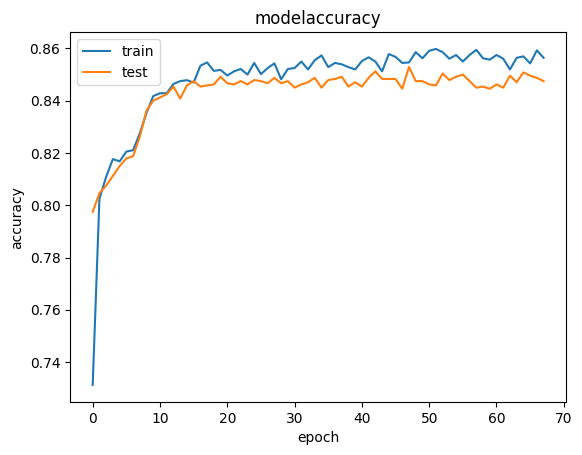

In [29]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('modelaccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


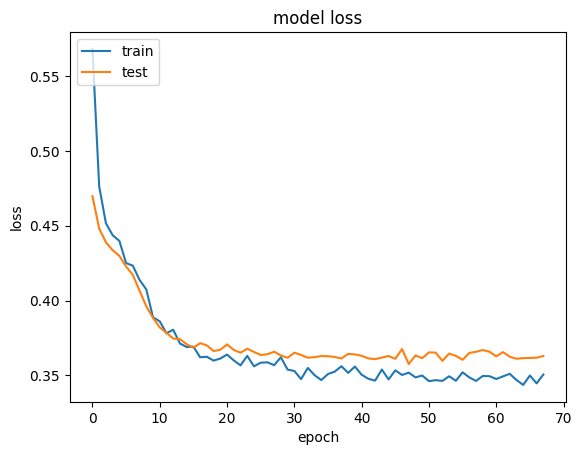

In [30]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [31]:
#Predict test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [32]:
# Make Confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[1552,   43],
       [ 238,  167]], dtype=int64)

In [33]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, y_test)
score

0.8595

In [34]:
#Get the weights
classifier.get_weights()

[array([[-0.15227175,  0.16904059, -0.09376404, -0.11340196,  0.01708662,
          0.21055776,  0.13479042,  0.19189116, -0.23040754, -0.14553602,
         -0.28141856],
        [-0.5237095 , -0.780113  ,  0.89920896, -0.31061187,  0.7966157 ,
         -0.9080688 , -0.20639072,  0.02765022,  0.27661005, -0.48018956,
         -0.2973097 ],
        [-0.10707507,  0.08032746, -0.10586832, -0.06364777, -0.01610676,
         -0.08418275, -0.15462019,  0.5546637 ,  0.3875554 , -0.08851527,
          0.13495223],
        [ 0.44212914, -0.14503594, -0.17575632,  0.39562136, -0.13168111,
         -0.32086727, -0.29711035, -0.6488994 , -0.27183184, -0.08004497,
         -0.07069658],
        [-0.35223323,  0.04265245, -0.5950208 ,  1.0255653 , -0.05876468,
         -0.06736083, -1.1064229 ,  0.48136365, -0.12640217,  0.02428867,
         -0.79483396],
        [ 0.09115832, -0.08235354,  0.07036659, -0.07826747, -0.03278389,
         -0.10039605,  0.02129493,  0.11735441,  0.43006715, -0.1380360